<a href="https://colab.research.google.com/github/yaraeslamm/Medical_Segmentation/blob/main/FeedForwardModel_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title mounting the drive & some imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing import image
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
base_dir = '/content/drive/MyDrive/MedDatasetTrial'

Mounted at /content/drive


In [ ]:
#@title loading images
# # Function to load images and their corresponding masks
# def load_images_and_masks(image_dir, mask_dir, img_size=(224, 224)):
#     # Get paths of all images and masks
#     image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir)]
#     mask_paths = [os.path.join(mask_dir, fname) for fname in os.listdir(mask_dir)]

#     images = []
#     masks = []

#     for img_path, mask_path in zip(image_paths, mask_paths):

#         print(f"Loading image: {img_path} and mask: {mask_path}")
#         # Load and resize the image
#         img = image.load_img(img_path, target_size=img_size, color_mode='grayscale')
#         img = image.img_to_array(img) / 255.0  # Normalize to [0, 1]

#         # Load and resize the mask (grayscale also)
#         mask = image.load_img(mask_path, target_size=img_size, color_mode='grayscale')
#         mask = image.img_to_array(mask) / 255.0  # Normalize to [0, 1]

#         # # Ensure both image and mask are in 2D shape (height, width)
#         images.append(img)  # Remove single channel dimension (grayscale)
#         masks.append(mask)  # Remove single channel dimension (grayscale)

#     return np.array(images), np.array(masks)

# # Load training, validation, and testing data
# X_train, y_train = load_images_and_masks(
#     base_dir + '/Training/images',
#     base_dir + '/Training/masks'
# )

# X_val, y_val = load_images_and_masks(
#     base_dir + '/Validation/images',
#     base_dir + '/Validation/masks'
# )

# X_test, y_test = load_images_and_masks(
#     base_dir + '/Testing/images',
#     base_dir + '/Testing/masks'
# )

# # Verify the shapes of loaded data
# print(X_train.shape, y_train.shape)
# print(X_val.shape, y_val.shape)
# print(X_test.shape, y_test.shape)


import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Function to load images and their corresponding masks, manually matching by filename
def load_images_and_masks(image_dir, mask_dir, img_size=(224, 224)):
    # Get the filenames of all images and masks
    image_filenames = sorted(os.listdir(image_dir))
    mask_filenames = sorted(os.listdir(mask_dir))

    # Ensure the filenames have the same length (image and mask count should match)
    assert len(image_filenames) == len(mask_filenames), "Mismatch between number of images and masks!"

    images = []
    masks = []

    for img_filename in image_filenames:
        # Extract the common base name (without extension) to match the mask
        base_name = os.path.splitext(img_filename)[0]

        print(base_name)

        # Find the corresponding mask filename (must match base_name)
        mask_filename = f"{base_name}.png"  # Assuming masks are also PNG files
        if mask_filename not in mask_filenames:
            print(f"Warning: No corresponding mask found for image {img_filename}. Skipping.")
            continue  # Skip if no corresponding mask is found

        # Load and resize the image
        img_path = os.path.join(image_dir, img_filename)
        img = image.load_img(img_path, target_size=img_size, color_mode='grayscale')
        img = image.img_to_array(img) / 255.0  # Normalize to [0, 1]

        # Load and resize the mask (grayscale)
        mask_path = os.path.join(mask_dir, mask_filename)
        mask = image.load_img(mask_path, target_size=img_size, color_mode='grayscale')
        mask = image.img_to_array(mask) / 255.0  # Normalize to [0, 1]


        print(f"Loading image: {img_path} and mask: {mask_path}")

        # Append the loaded image and mask
        images.append(img)
        masks.append(mask)

    return np.array(images), np.array(masks)


# Example usage
X_train, y_train = load_images_and_masks(
    '/content/drive/MyDrive/MedDatasetTrial/Training/images',
    '/content/drive/MyDrive/MedDatasetTrial/Training/masks'
)

X_val, y_val = load_images_and_masks(
    '/content/drive/MyDrive/MedDatasetTrial/Validation/images',
    '/content/drive/MyDrive/MedDatasetTrial/Validation/masks'
)

X_test, y_test = load_images_and_masks(
    '/content/drive/MyDrive/MedDatasetTrial/Testing/images',
    '/content/drive/MyDrive/MedDatasetTrial/Testing/masks'
)

# Verify the shapes of loaded data
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)



1
Loading image: /content/drive/MyDrive/MedDatasetTrial/Training/images/1.png and mask: /content/drive/MyDrive/MedDatasetTrial/Training/masks/1.png
10
Loading image: /content/drive/MyDrive/MedDatasetTrial/Training/images/10.png and mask: /content/drive/MyDrive/MedDatasetTrial/Training/masks/10.png
100
Loading image: /content/drive/MyDrive/MedDatasetTrial/Training/images/100.png and mask: /content/drive/MyDrive/MedDatasetTrial/Training/masks/100.png
1000
Loading image: /content/drive/MyDrive/MedDatasetTrial/Training/images/1000.png and mask: /content/drive/MyDrive/MedDatasetTrial/Training/masks/1000.png
1001
Loading image: /content/drive/MyDrive/MedDatasetTrial/Training/images/1001.png and mask: /content/drive/MyDrive/MedDatasetTrial/Training/masks/1001.png
1002
Loading image: /content/drive/MyDrive/MedDatasetTrial/Training/images/1002.png and mask: /content/drive/MyDrive/MedDatasetTrial/Training/masks/1002.png
1003
Loading image: /content/drive/MyDrive/MedDatasetTrial/Training/images/1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 50176)          │     6,472,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 224, 224, 1)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,327,552 (123.32 MB)

 Trainable params: 32,327,552 (123.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.9238 - dice_coef: 0.0711 - loss: 0.1855 - mean_io_u_2: 0.4920 - precision_2: 0.0230 - recall_2: 0.0774

88/88 ━━━━━━━━━━━━━━━━━━━━ 63s 681ms/step - accuracy: 0.9243 - dice_coef: 0.0712 - loss: 0.1845 - mean_io_u_2: 0.4920 - precision_2: 0.0230 - recall_2: 0.0768 - val_accuracy: 0.9847 - val_dice_coef: 0.0858 - val_loss: 0.0593 - val_mean_io_u_2: 0.4923 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.9841 - dice_coef: 0.0938 - loss: 0.0611 - mean_io_u_2: 0.4921 - precision_2: 0.1845 - recall_2: 4.2431e-04

88/88 ━━━━━━━━━━━━━━━━━━━━ 79s 657ms/step - accuracy: 0.9841 - dice_coef: 0.0939 - loss: 0.0611 - mean_io_u_2: 0.4921 - precision_2: 0.1856 - recall_2: 4.3353e-04 - val_accuracy: 0.9847 - val_dice_coef: 0.1167 - val_loss: 0.0560 - val_mean_io_u_2: 0.4923 - val_precision_2: 0.4165 - val_recall_2: 0.0024
Epoch 3/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 75s 587ms/step - accuracy: 0.9838 - dice_coef: 0.1082 - loss: 0.0599 - mean_io_u_2: 0.4919 - precision_2: 0.4014 - recall_2: 0.0098 - val_accuracy: 0.9845 - val_dice_coef: 0.1385 - val_loss: 0.0564 - val_mean_io_u_2: 0.4923 - val_precision_2: 0.3853 - val_recall_2: 0.0211
Epoch 4/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 91s 687ms/step - accuracy: 0.9842 - dice_coef: 0.1310 - loss: 0.0560 - mean_io_u_2: 0.4921 - precision_2: 0.5313 - recall_2: 0.0270 - val_accuracy: 0.9843 - val_dice_coef: 0.1477 - val_loss: 0.0597 - val_mean_io_u_2: 0.4923 - val_precision_2: 0.4305 - val_recall_2: 0.0764
Epoch 5/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 53s 598ms/step - accuracy: 0.9839 - 

88/88 ━━━━━━━━━━━━━━━━━━━━ 87s 646ms/step - accuracy: 0.9848 - dice_coef: 0.2683 - loss: 0.0422 - mean_io_u_2: 0.4921 - precision_2: 0.5727 - recall_2: 0.1689 - val_accuracy: 0.9841 - val_dice_coef: 0.2098 - val_loss: 0.0554 - val_mean_io_u_2: 0.4923 - val_precision_2: 0.4225 - val_recall_2: 0.1087
Epoch 11/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 76s 573ms/step - accuracy: 0.9853 - dice_coef: 0.2833 - loss: 0.0418 - mean_io_u_2: 0.4921 - precision_2: 0.6174 - recall_2: 0.1949 - val_accuracy: 0.9840 - val_dice_coef: 0.1749 - val_loss: 0.0557 - val_mean_io_u_2: 0.4923 - val_precision_2: 0.3744 - val_recall_2: 0.0662
Epoch 12/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 85s 611ms/step - accuracy: 0.9854 - dice_coef: 0.2944 - loss: 0.0402 - mean_io_u_2: 0.4922 - precision_2: 0.6004 - recall_2: 0.2096 - val_accuracy: 0.9837 - val_dice_coef: 0.1619 - val_loss: 0.0564 - val_mean_io_u_2: 0.4923 - val_precision_2: 0.3110 - val_recall_2: 0.0519
Epoch 13/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 80s 600ms/step - accuracy: 0.9858 - d

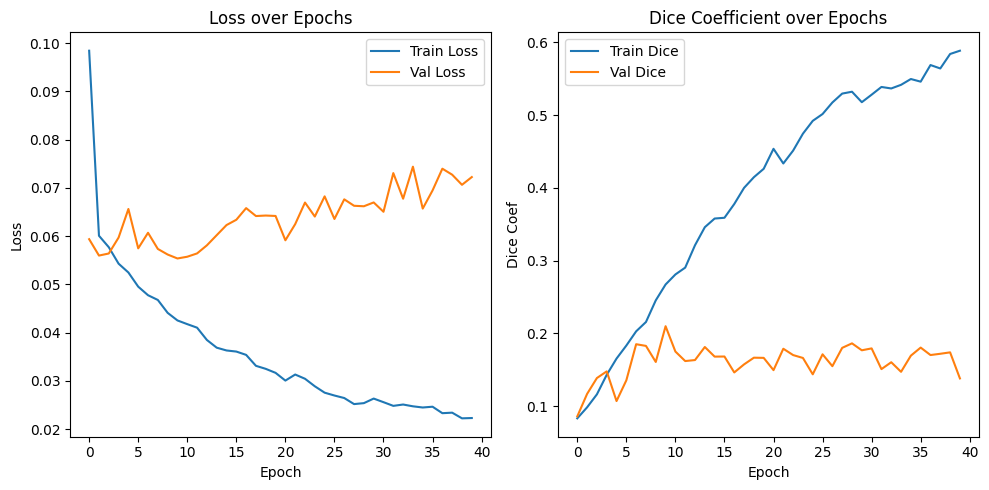

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.9930 - dice_coef: 0.3988 - loss: 0.0185 - mean_io_u_2: 0.4962 - precision_2: 0.5394 - recall_2: 0.5231
Test Loss: 0.0219
Test Accuracy: 0.9922
Precision: 0.5319
Recall: 0.4377
Mean IoU: 0.4959
Dice Coefficient: 0.3478
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


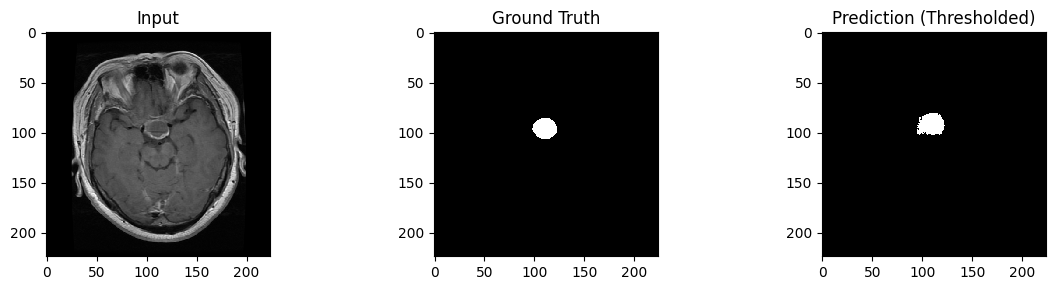

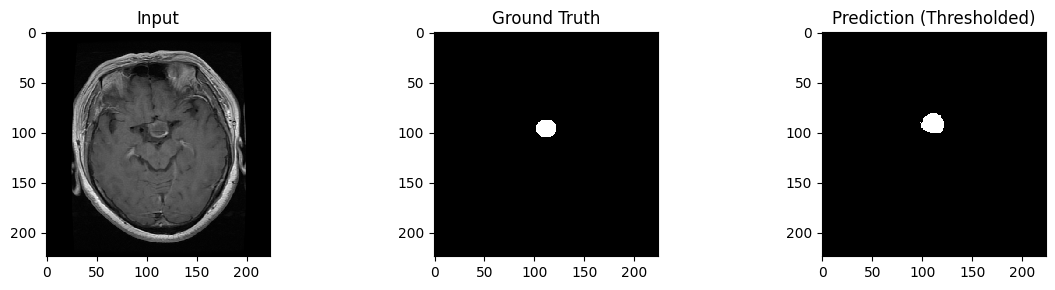

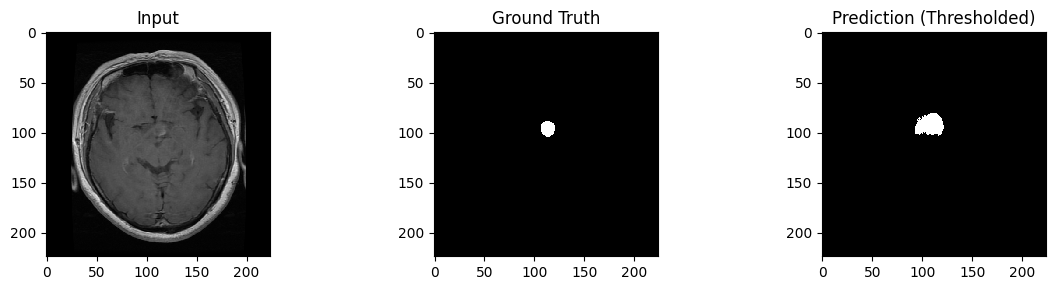

In [ ]:
#@title model & training & evaluation

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall ,MeanIoU
from tensorflow.keras import backend as K

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersect = K.sum(y_true_f * y_pred_f)
    return (2. * intersect + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

def iou_metric(y_true, y_pred):
    y_pred = K.round(y_pred)
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true + y_pred, axis=[1,2,3]) - intersection
    iou = intersection / (union + K.epsilon())
    return K.mean(iou)


def create_feed_forward_segmentation_model(input_shape=(224, 224, 1)):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(224*224, activation='sigmoid'))
    model.add(layers.Reshape((224, 224, 1)))
    return model

model = create_feed_forward_segmentation_model()


model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), MeanIoU(num_classes=2),dice_coef])


model.summary()


checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True)


history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=40,
                    batch_size=16,
                    callbacks=[checkpoint])


# plt.figure(figsize=(10, 5))
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Val Accuracy')
# plt.title('Accuracy over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['dice_coef'], label='Train Dice')
plt.plot(history.history['val_dice_coef'], label='Val Dice')
plt.title('Dice Coefficient over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Dice Coef')
plt.legend()
plt.tight_layout()
plt.show()





# loss, acc, prec, rec, f1 = model.evaluate(X_test, y_test)
# print(f"\nTest Loss: {loss:.4f}")
# print(f"Test Accuracy: {acc:.4f}")
# print(f"Precision: {prec:.4f}")
# print(f"Recall: {rec:.4f}")
# print(f"F1 Score: {f1:.4f}")


# loss, dice, iou = model.evaluate(X_test, y_test)
# print(f"Test Loss: {loss:.4f}")
# print(f"Dice Coefficient: {dice:.4f}")
# print(f"Mean IoU: {iou:.4f}")


loss, acc, precision, recall, mean_iou, dice = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Mean IoU: {mean_iou:.4f}")
print(f"Dice Coefficient: {dice:.4f}")




# Save the trained model to a file
model.save('/content/drive/MyDrive/feedForwardSegmentation_model.keras')



#to reload it again
# from tensorflow.keras.models import load_model

# model = load_model('/content/drive/MyDrive/segmentation_model.h5',
#                    custom_objects={'MeanIoU': MeanIoU(num_classes=2), 'iou_metric': iou_metric})



# Apply thresholding to predictions
threshold = 0.5

preds = model.predict(X_test)

binary_preds = (preds > threshold).astype(np.float32)


# Display results
for i in range(3):
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title("Input")

    plt.subplot(1, 3, 2)
    plt.imshow(y_test[i].squeeze(), cmap='gray')
    plt.title("Ground Truth")

    plt.subplot(1, 3, 3)
    plt.imshow(binary_preds[i].squeeze(), cmap='gray')
    plt.title("Prediction (Thresholded)")

    plt.tight_layout()
    plt.show()

# for i in range(3):
#     plt.figure(figsize=(12, 3))
#     plt.subplot(1, 3, 1)
#     plt.imshow(X_test[i].squeeze(), cmap='gray')
#     plt.title("Input")

#     plt.subplot(1, 3, 2)
#     plt.imshow(y_test[i].squeeze(), cmap='gray')
#     plt.title("Ground Truth")

#     plt.subplot(1, 3, 3)
#     plt.imshow(preds[i].squeeze(), cmap='gray')
#     plt.title("Prediction")

#     plt.tight_layout()
#     plt.show()


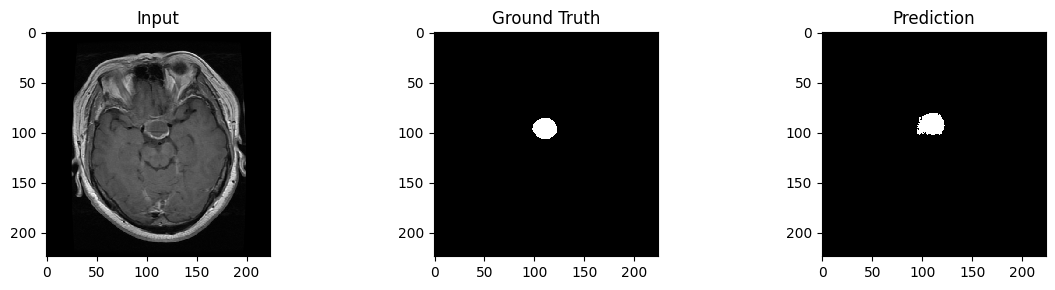

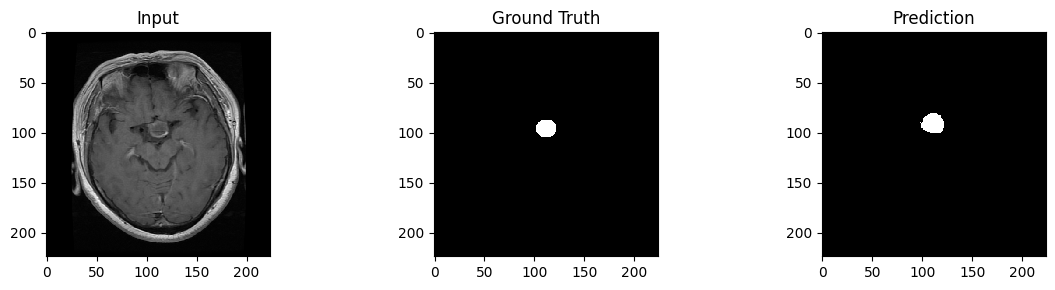

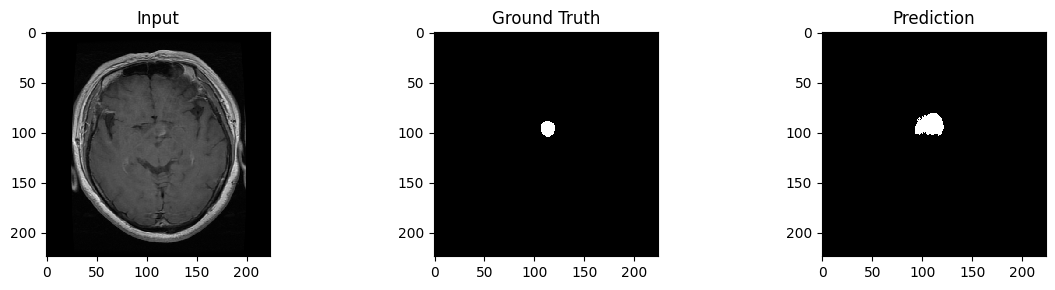

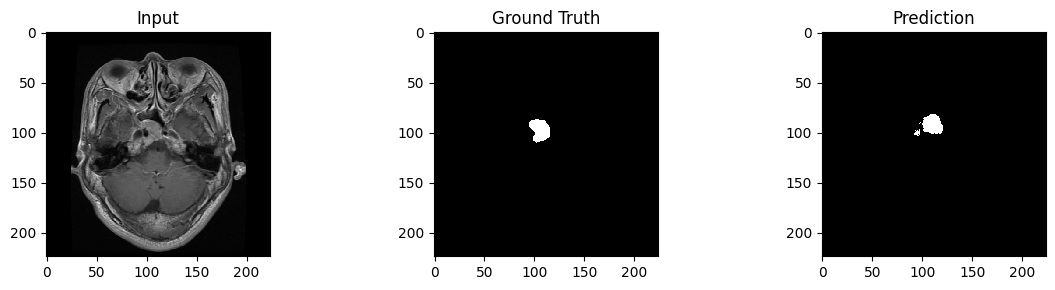

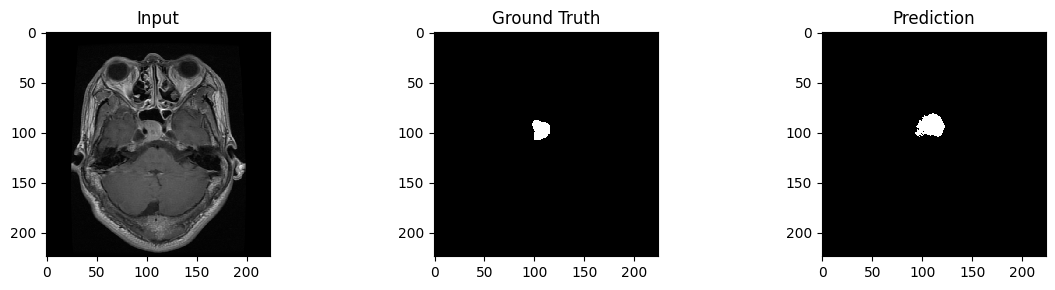

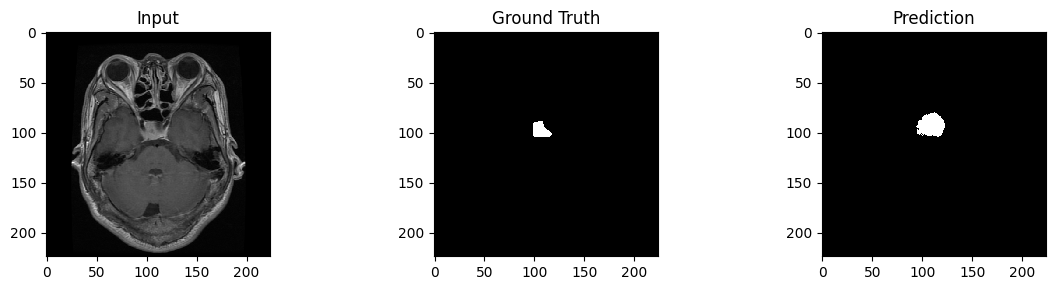

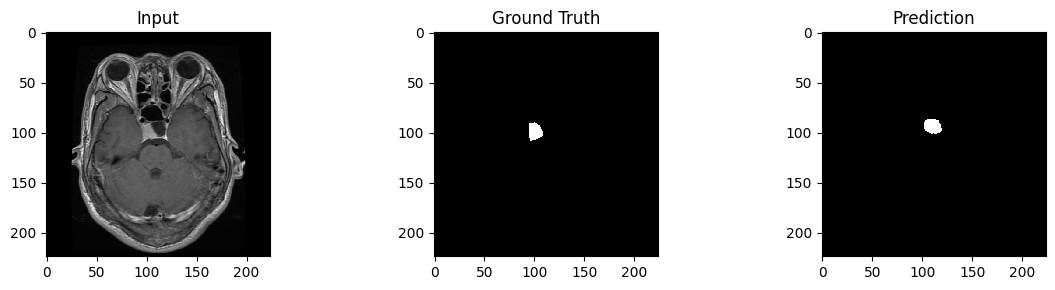

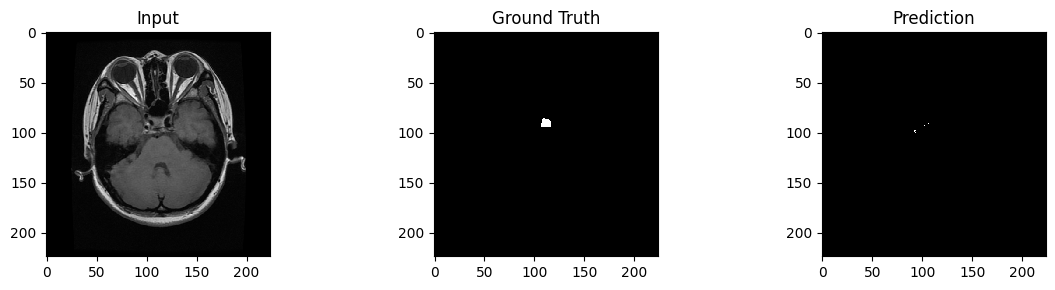

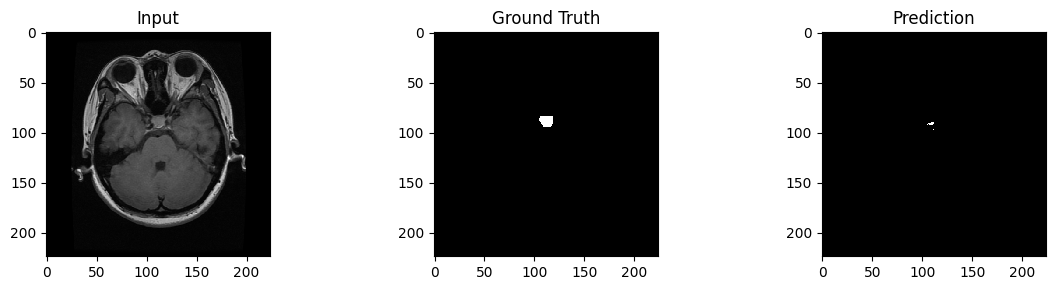

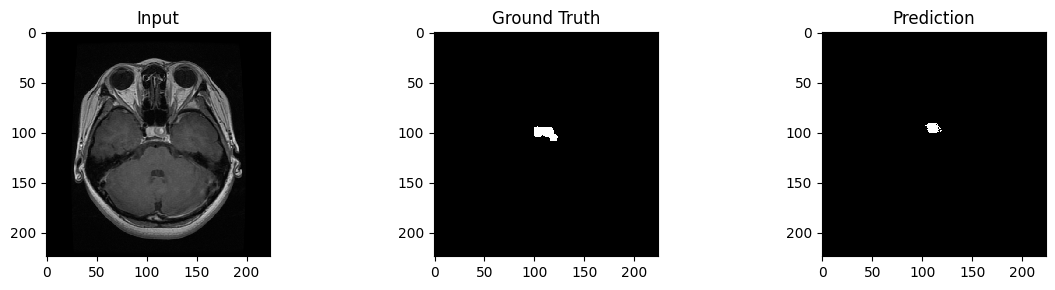

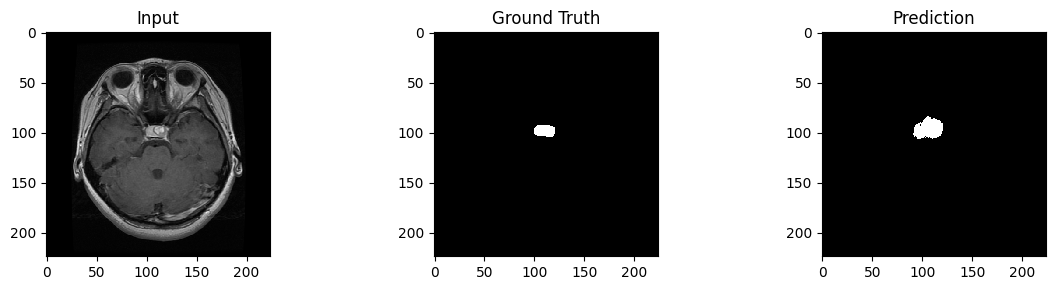

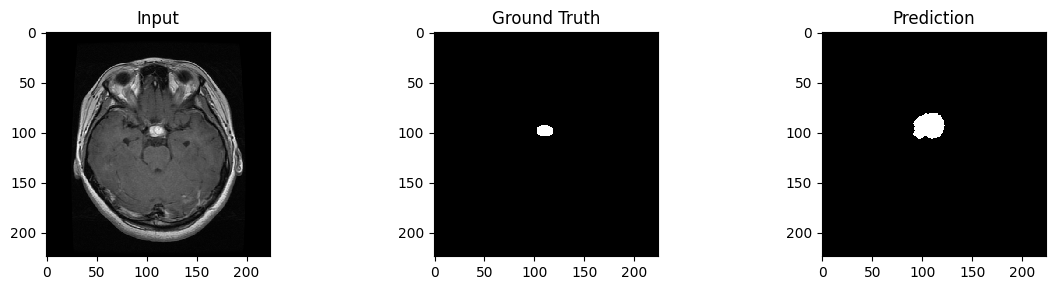

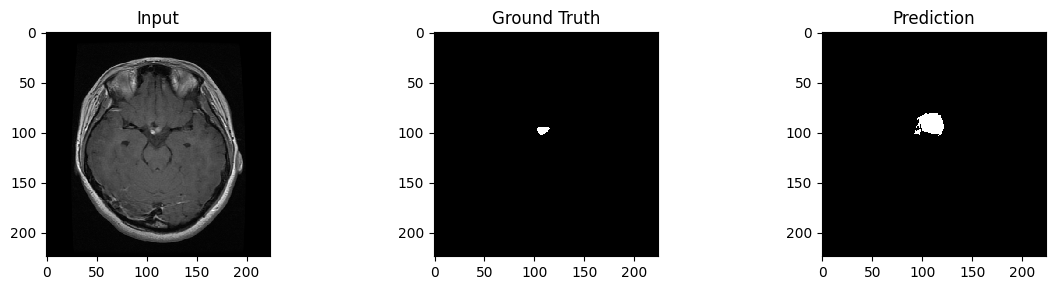

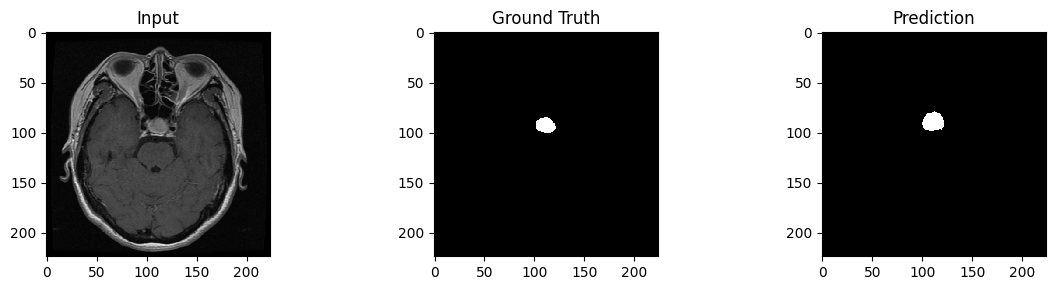

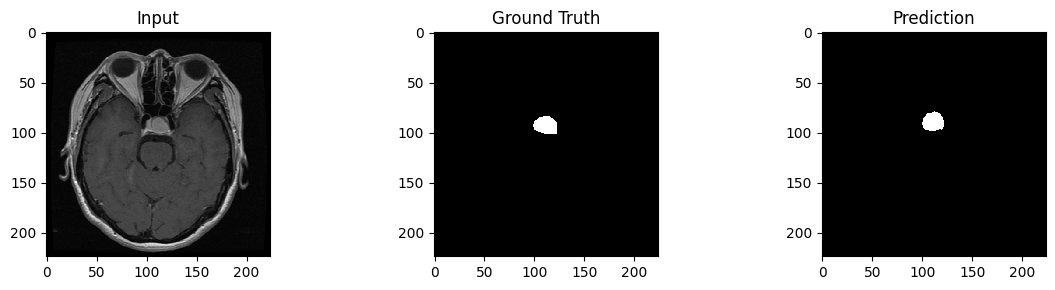

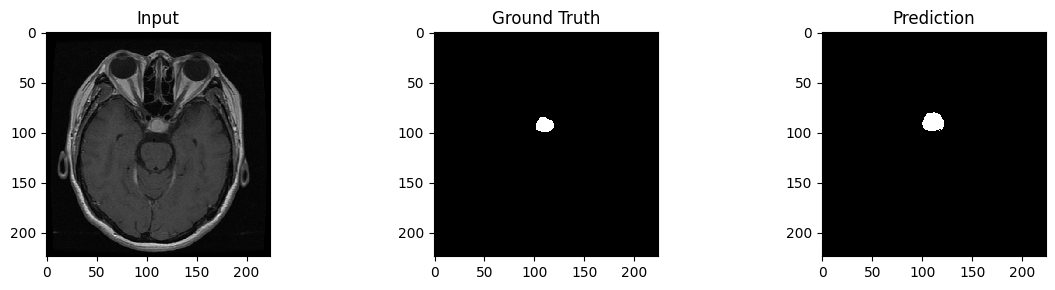

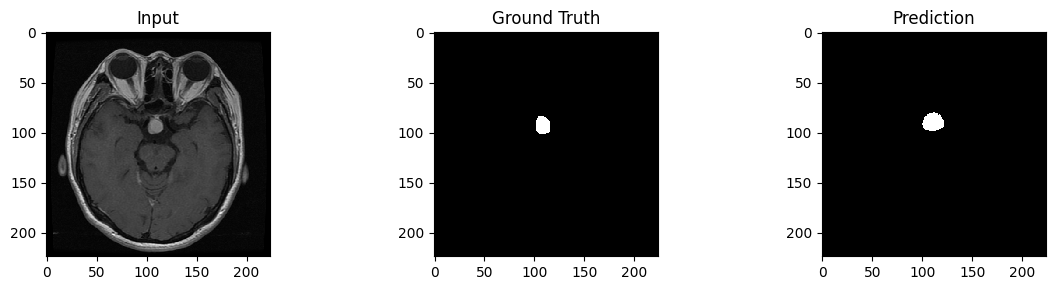

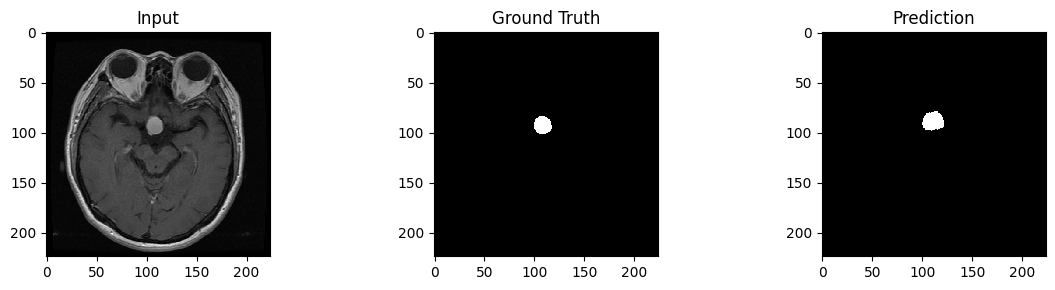

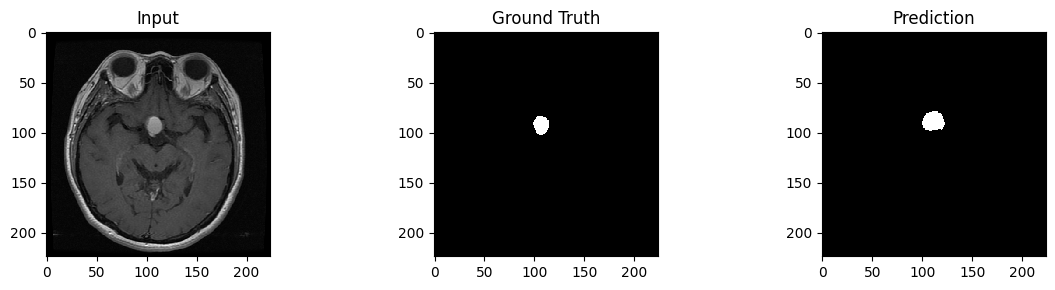

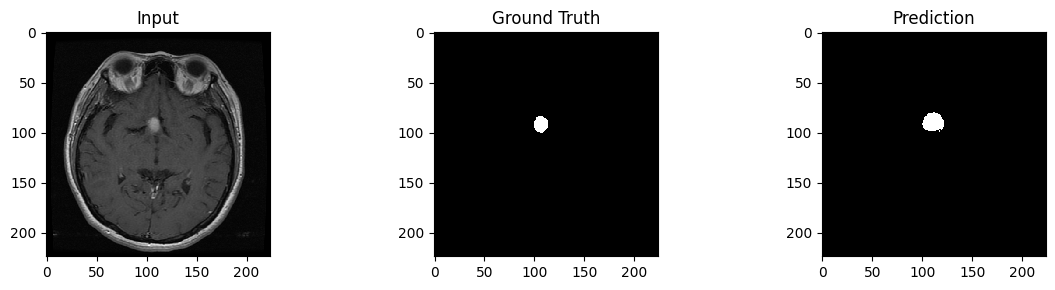

In [ ]:
#@title output samples (predictions compared to input and ground truth)

for i in range(20):
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title("Input")

    plt.subplot(1, 3, 2)
    plt.imshow(y_test[i].squeeze(), cmap='gray')
    plt.title("Ground Truth")

    plt.subplot(1, 3, 3)
    plt.imshow(binary_preds[i].squeeze(), cmap='gray')
    plt.title("Prediction")

    plt.tight_layout()
    plt.show()